In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

print(f"X_train shape:{X_train.shape}")
print(f"y_train shape = {y_train.shape}")

4422102/4422102 [==============================] - 0s 0us/step
X_train shape:(60000, 28, 28)
y_train shape = (60000,)


In [ ]:
X_train = np.expand_dims(X_train,-1)  #Convolution layers except SxNxDxC, WHİCH MEANS 4 Dimension.This function increases the dimension
X_test = np.expand_dims(X_test,-1) 

In [ ]:
print(f"X_train shape:{X_train.shape}")

X_train shape:(60000, 28, 28, 1)


In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
K = len(set(y_train)) # In order to get the class names for softmax layer,which is the last layer where we actually classifiy data
# set () function gets us the unique values of the given data 
K

10

In [34]:
fashion_mnist_elements = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
i = Input(shape=X_train[0].shape) # requires dimensions of a single image ,in other words; dimensions without the first one. Ex. (6000,28,28,1) => it takes (28,28,1)  
x = Conv2D(filters=32, kernel_size=(3, 3), strides=2, activation="relu")(i)
x = Conv2D(64,(3, 3), strides=2, activation="relu")(x)
x = Conv2D(128,(3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K,activation="softmax")(x)

model = Model(i,x)


In [ ]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

r = model.fit(X_train,y_train ,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 53s 25ms/step - loss: 0.5207 - accuracy: 0.8078 - val_loss: 0.4011 - val_accuracy: 0.8479
Epoch 2/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3633 - accuracy: 0.8642 - val_loss: 0.3492 - val_accuracy: 0.8702
Epoch 3/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3150 - accuracy: 0.8817 - val_loss: 0.3181 - val_accuracy: 0.8853
Epoch 4/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2849 - accuracy: 0.8921 - val_loss: 0.3147 - val_accuracy: 0.8860
Epoch 5/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2564 - accuracy: 0.9038 - val_loss: 0.3149 - val_accuracy: 0.8864
Epoch 6/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2339 - accuracy: 0.9114 - val_loss: 0.3038 - val_accuracy: 0.8893
Epoch 7/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2183 - accuracy: 0.9169 - val_loss: 0.2872 -

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

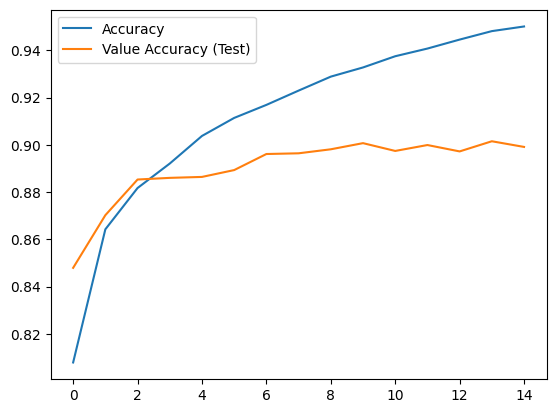

In [ ]:
plt.plot(r.history["accuracy"],label="Accuracy")
plt.plot(r.history["val_accuracy"],label="Value Accuracy (Test)")
plt.legend()

In [39]:
p_test=model.predict(X_test).argmax(axis=1) 
# model.preidct gives 1000 x [output classes] matrix with each column on the same row gives you the probability of the given class.
# Argmax function with the parameter of (axis= 1) allows you to pick only maximum values of the same row.So in this case
# input becomes 1000 size vector from 1000,10 size matrix

print(p_test.shape) # Output is a vector

313/313 [==============================] - 2s 6ms/step
(10000,)


Text(0.5, 1.0, "True is T-shirt/top but it's given Pullover")

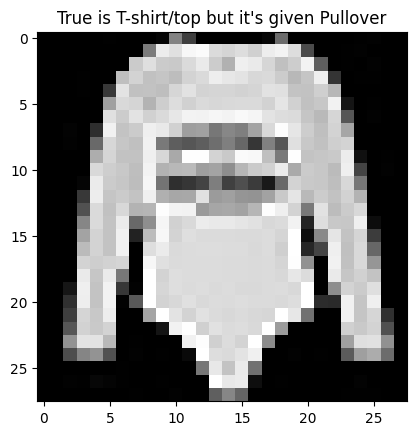

In [42]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28),cmap="gray") # imshow requires NxD image but our images are NxDx1 so we use reshape
plt.title(f"True is {fashion_mnist_elements[y_test[i]]} but it's given {fashion_mnist_elements[p_test[i]]}")

0